In [4]:
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [5]:
#Encode text to CLIP vector
def encode_text(search_query):
  with torch.no_grad():
    # Encode and normalize the search query using CLIP
    text_encoded = model.encode_text(clip.tokenize(search_query).to(device))
    text_encoded /= text_encoded.norm(dim=-1, keepdim=True)

  # Retrieve the feature vector
  return text_encoded

In [6]:
def encode_image(image_path):
  from PIL import Image
  image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
  image_features = model.encode_image(image)
  image_features /= image_features.norm(dim=-1, keepdim=True)
  return image_features

In [7]:
def get_similarity(search_query, image_path):
    photo_features = encode_image(image_path)
    text_features = encode_text(search_query)
    return (photo_features @ text_features.T).squeeze(1).item()

get_similarity("crying girl ", 'C:\\Users\\ACER\\OneDrive\\Desktop\\Image+Text\\Images\\sad_girl1.jpg')

0.2810862958431244

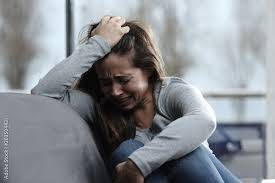

In [6]:
def display_image(path):
    from IPython.display import Image
    display(Image(path))
display_image('C:\\Users\\ACER\\OneDrive\\Desktop\\Image+Text\\Images\\sad_girl1.jpg')

In [ ]:
'''
Lets decide some categories:
1> Sports
2> Wedding
3> 

'''

In [8]:
import pandas as pd

In [8]:
df = pd.read_csv('Laptions.csv')

In [23]:
df.shape

(297, 2)

In [11]:
'''
INPUT: Image and database
Output: Most similar caption

'''

'\nINPUT: Image and database\nOutput: Most similar caption\n\n'

In [79]:
df['Vec'] = df['CAPTION'].apply(lambda x: encode_text(x))

In [80]:
tensor_list = [tensor for tensor in df['Vec']]

In [107]:
tensor_list[0].shape

torch.Size([1, 512])

In [81]:
vector_db = torch.stack(tensor_list)

In [83]:
torch.save(vector_db, 'vector_db.pt')

In [ ]:
df['Vec'] = [i for i in vector_db]
a = df[df['TOPIC'] != 'Nature: Post pictures of beautiful landscapes, animals, and plants.']

In [24]:
df = pd.read_csv('Laptions.csv')
vector_db = torch.load('vector_db.pt')
df['Vec'] = [i for i in vector_db]

In [13]:
def get_single_vector(image_path,text = ''):
    features = encode_image(image_path)
    if(text != ''):
        features += encode_text(text)
    return features

In [14]:
def get_most_similar_caption_from_text_image(image_path,df,text = ''):
    features = get_single_vector(image_path,text)
    df['Similarity'] = df['Vec'].apply(lambda x: (features @ x.T).squeeze(1).item())
    return df.sort_values(by=['Similarity'],ascending=False)

In [33]:
p = get_most_similar_caption_from_text_image("Images\\bride_groom1.jpg",df,'nature')['CAPTION']#.iloc[0]

In [34]:
p

114    "Nature is not just a backdrop, it's a protago...
100    "Nature is the art of God. What's your favorit...
109    "Nature is not just a pretty sight, it's a liv...
105    "Nature is the best teacher. What's the most i...
99     "Nature is not a place to visit, it's home. Wh...
                             ...                        
246                    Messy bun and getting stuff done.
295    My mirror and my camera have two completely di...
242    College is nice. You can wear the same shirt t...
291          I cleaned the bathroom to take this selfie.
277    I'm not taking a mirror selfie, I'm just showi...
Name: CAPTION, Length: 297, dtype: object

In [114]:
def get_most_similar_captions(image_path,df):
    photo_features = encode_image(image_path)
    df['Similarity'] = df['Vec'].apply(lambda x: (photo_features @ x.T).squeeze(1).item())
    return df.sort_values(by=['Similarity'],ascending=False)

In [118]:
p = get_most_similar_captions("Images\Food1.jpg",a)['CAPTION'].iloc[0]

C:\Users\ACER\AppData\Local\Temp\ipykernel_22972\838914041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Similarity'] = df['Vec'].apply(lambda x: (photo_features @ x.T).squeeze(1).item())


In [120]:
p

'"Eating local is not just a trend, it\'s a way of life."'

tensor([[[ 0.0018, -0.0102,  0.0324,  ...,  0.0075, -0.0294,  0.0052]],

        [[ 0.0190,  0.0157,  0.0139,  ...,  0.0084,  0.0045, -0.0025]],

        [[ 0.0081,  0.0058, -0.0467,  ..., -0.0240,  0.0093,  0.0025]],

        ...,

        [[-0.0047, -0.0015, -0.0266,  ..., -0.0508, -0.0169, -0.0107]],

        [[ 0.0211,  0.0020, -0.0284,  ..., -0.0113,  0.0134, -0.0074]],

        [[ 0.0073, -0.0034, -0.0114,  ..., -0.0421, -0.0053,  0.0039]]])